## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
var_list = ['occ', 'prestige', 'wrkslf', 'wrkgovt', 'commute', 'industry', 'occ80'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [3]:
data = pd.read_csv('selected_gss_data.csv')
data.head(5) #Load file with saved data and output first 5 rows

,occ,prestige,wrkslf,wrkgovt,commute,industry,occ80
0,205.0,50.0,someone else,NaN,NaN,department and mail order establishments,NaN
1,441.0,45.0,someone else,NaN,NaN,newspaper publishing and printing,NaN
2,270.0,44.0,someone else,NaN,NaN,"real estate, incl. real estate-insurance-law o...",NaN
3,1.0,57.0,someone else,NaN,NaN,apparel and accessories,NaN
4,385.0,40.0,someone else,NaN,NaN,telephone (wire and radio),NaN


In [4]:
print(data.info()) #Information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   occ       24267 non-null  float64
 1   prestige  24267 non-null  float64
 2   wrkslf    68349 non-null  object 
 3   wrkgovt   28079 non-null  object 
 4   commute   1330 non-null   float64
 5   industry  24207 non-null  object 
 6   occ80     31434 non-null  object 
dtypes: float64(3), object(4)
memory usage: 3.9+ MB
None


In [5]:
print(data.describe()) #Describing the dataset

                occ      prestige      commute
count  24267.000000  24267.000000  1330.000000
mean     468.067911     39.356451    20.245865
std      279.188558     14.037120    17.082472
min        1.000000     12.000000     0.000000
25%      245.000000     30.000000    10.000000
50%      394.000000     39.000000    15.000000
75%      694.000000     48.000000    30.000000
max      984.000000     82.000000    97.000000


In [7]:
print(data.isnull().sum()) #Check for missing values

occ         48123
prestige    48123
wrkslf       4041
wrkgovt     44311
commute     71060
industry    48183
occ80       40956
dtype: int64


In [8]:
#Calculate average prestige score
avg_prestige = data['prestige'].mean()
print(avg_prestige)

39.35645114764907


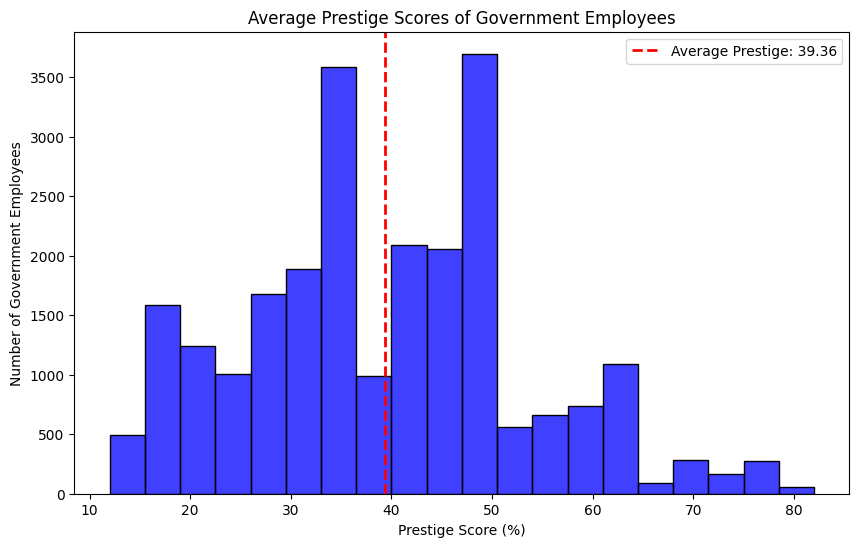

In [45]:
#Histogram showing average prestige scores
plt.figure(figsize=(10, 6))
sns.histplot(data['prestige'], bins=20, color='blue', edgecolor='black')

# Add a vertical line for the average prestige score
plt.axvline(avg_prestige, color='red', linestyle='dashed', linewidth=2, label=f'Average Prestige: {avg_prestige:.2f}')

# Add title and labels
plt.title('Average Prestige Scores of Government Employees')
plt.xlabel('Prestige Score (%)')
plt.ylabel('Number of Government Employees')

#Add legend
plt.legend()

#Show plot
plt.show()

In [10]:
#Calculate average commute time
avg_commute = data['commute'].mean()
print(avg_commute)

20.245864661654135


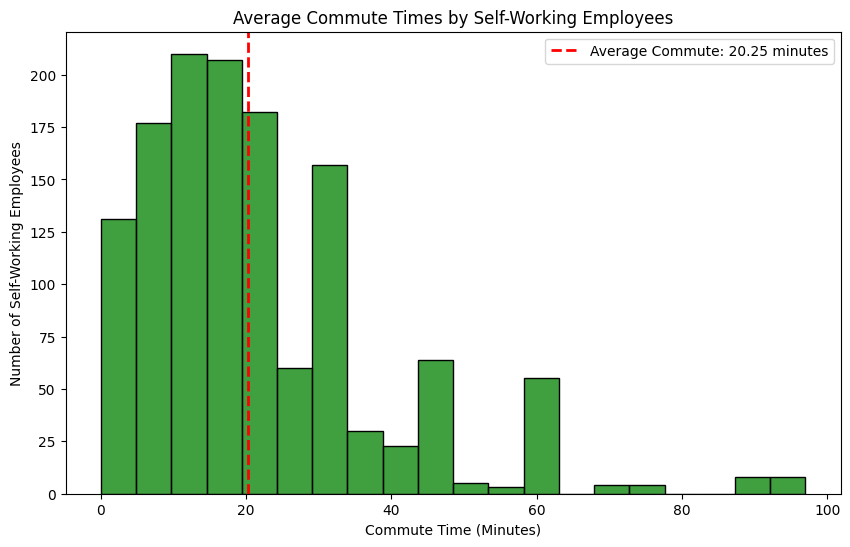

In [44]:
#Histogram showing average commute cimes
plt.figure(figsize=(10, 6))
sns.histplot(data['commute'], bins=20, color='green', edgecolor='black')

# Add a vertical line for the average commute time
plt.axvline(avg_commute, color='red', linestyle='dashed', linewidth=2, label=f'Average Commute: {avg_commute:.2f} minutes')

# Add title and labels
plt.title('Average Commute Times by Self-Working Employees')
plt.xlabel('Commute Time (Minutes)')
plt.ylabel('Number of Self-Working Employees')

#Add legend
plt.legend()

#Show plot
plt.show()

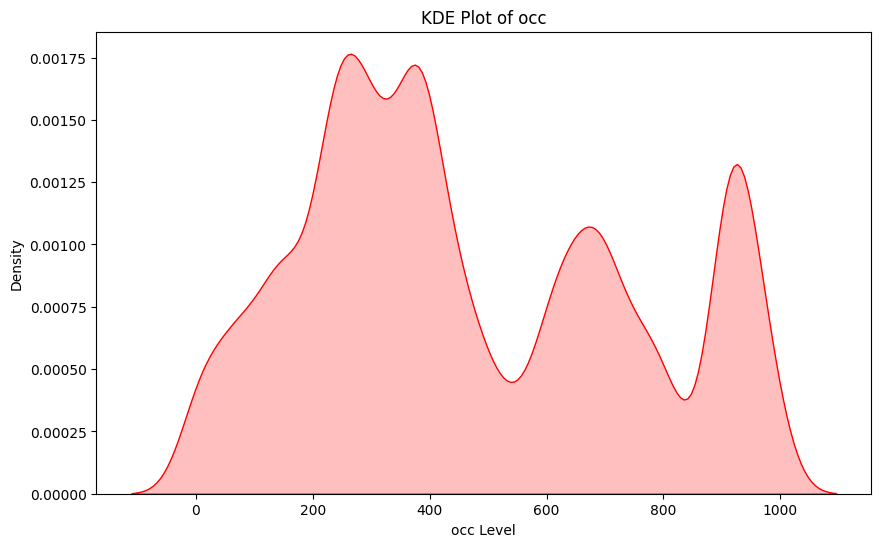

In [41]:
# KDE plot showing occ levels and the concentration of their density values
plt.figure(figsize=(10, 6))

# Create a KDE plot for 'prestige'
sns.kdeplot(data['occ'], color='red', fill=True)

# Add titles and labels
plt.title('KDE Plot of occ')
plt.xlabel('occ Level')
plt.ylabel('Density')

# Show the plot
plt.show()

1. From the GSS data, I downloaded these variables: occ, prestige, wrkslf, wrkgovt, commute, industry, and occ80 (respondent's occupation). The reasons why I chose the occupation variable and the associated variables are highlighted in Part 2 below.

2. I chose to explore the occupation variable because of personal interest and curiosity, relevance to social and economic trends, and provide insights that can inform education and training programs targeted to address labor market needs. From a technical standpoint, I chose to explore the occupation variable because of detailed data availability in the GSS dataset.

Personal Interest and Curiosity: One of my interests is in addressing social and economic inequalities, and exploring the occupation variable for this project is a fascinating endeavor. Further, since occupation is closely tied to an individual's sense of identity and purpose, I was curious to explore how occupation is correlated or not to demographics such as age, race, gender, education, income, and employment type.  

Relevance to Social and Economic Trends: Occupation is a key aspect of an individual's life, influencing their socioeconomic status, lifestyle, and interactions. Analyzing occupations can reveal Insights into workforce trends as it pertains to several demographic variables such as age, race, gender, education, income, and employment type.  
Research and Policy Implications

Informing education and training programs: Insights into occupational trends can help policymakers and educators develop targeted programs to address labor market needs, and inform economic development strategies, helping to create jobs and stimulate growth.

Data availability: The GSS dataset provides a reliable and consistent source of occupational data, allowing for longitudinal analysis and trend identification. Further, the GSS occupation variable is coded using a detailed classification system, enabling nuanced analysis and comparison.


In the GSS dataset,  I chose to explore how a person’s occupation correlates or not correlates with prestige, employment type (work for self or work for the government), commute time, and industry. I selected these variables for the following reasons: (a) They would offer a glimpse into a multifaceted view of individuals' work lives and socioeconomic standing. (b) After I studied the data from GSS, I noticed that these variables are well defined and have enough data to provide an overview of the trends in occupations across a reasonable sample.

Occupation: This is a fundamental variable describing a person's job.  It's a categorical variable allowing for analysis of occupational distributions, trends, and potential relationships with other factors.

Prestige (Occupational Prestige): This reflects the societal status associated with a particular occupation. It's often a continuous variable, allowing you to see the social hierarchy of occupations and its association with other aspects like income, education, and satisfaction.

Work for self (Self-employed): This binary variable (likely 0/1) indicates whether someone is self-employed or works for an employer like the government. It allows for comparisons between the characteristics of self-employed individuals and employees.

Works for government:  Similar to self employed, this binary variable (likely 0/1) identifies whether someone works for a government entity, allowing you to compare government workers to those in the private sector.

Commute (Commute time): This variable captures the time spent commuting to work. It's relevant for studies of work-life balance, quality of life, and potentially the relationship between geographic location and job opportunities. Long and short commutes correlate differently with specific industries or occupations.

Industry (Industry): This variable categorizes the industry sector in which a person works (e.g., manufacturing, healthcare, finance).  It provides insight into the overall structure of the economy and the distribution of employment across different sectors.

Occupation in 1980: This provides an opportunity to study occupational mobility and career trajectories over time. I can also compare occ and occ80 to see how people's positions in job occupations changed over that period.

3. Data is loaded in code above

4. Numeric summaries and visualizations are in code above

5. The findings above show information about a dataset in code chunks, extracts specific variables, and performs some basic analysis on the data. The selected variables in the dataset are occ, prestige, wrkslf, wrkgovt, commute, industry, and occ80. The analysis is focused on three key variables: prestige, commute, and occ. It also involves calculating the average values of prestige and commute, visualizing their distributions using histograms, and exploring the density of the occ variable through a Kernel Density Estimate (KDE) plot.

a) The prestige variable is analyzed to understand the prestige levels of government employees. The average prestige score (mean) is calculated and printed, providing a numerical summary of the data. A histogram is then created to visualize the distribution of prestige scores among the individuals in the dataset. The plot shows that the majority of government workers got a prestige score of about 50, and a vertical red dashed line is added to indicate the average prestige score (mean). This helps contextualize the distribution by showing where most individuals’ prestige scores lie in relation to the overall average.

The average prestige score, along with the histogram, offers insights into how individuals in the dataset perceive the prestige associated with their occupations. It may indicate the relative status of occupations in society, with higher prestige scores likely corresponding to more high-status occupational jobs.

b) Similarily, the commute variable is analyzed to understand the average commute time for self-working employees in the dataset. The average commute time is calculated and printed, and a histogram is plotted to visualize the distribution of commute times among the employees. The histogram provides a clear view of the range of commute times and how they are distributed across the dataset. Again, a vertical red dashed line is drawn to mark the average commute time (mean).

This analysis of commute times is important for understanding how long individuals are spending traveling to work. The majority of individuals prefer shorter commute times because they provide for an easier way to balance work-life routines. While long commute times can have implications for work, life, and job satisfaction. The plot highlights whether the dataset contains individuals with particularly long or short commutes and whether there are patterns or outliers in the distribution.

c) The occ variable, which represents occupational levels, is visualized using a Kernel Density Estimate (KDE) plot. It shows that any occ level between 200-400 has the highest density while an occ level between 600-800 has the lowest density. The KDE plot smooths the data and provides a clearer view of how different occupation levels are distributed across the workforce population.

The KDE plot is useful for highlighting whether/when certain occupation levels are more common than others. For example, if the distribution is heavily skewed, it may suggest that most individuals in the dataset belong to a particular occupation group, while fewer people are spread across other occupation categories.


In summary, when analyzed together, the above variables can enable a data scientist to gain insights from different angles. For example, one can ask a variety of questions such as: (a) Do certain industries have higher prestige occupations than others? (b) Do certain occupations (e.g., highly paid ones) correlate with longer commutes? (c ) How much did occupations change between 1980 and the survey year for a given individual (Occupational mobility)? (d) Did people move to higher prestige jobs? (e) Are self-employed people generally in lower or higher prestige occupations? (f) How do government workers compare to private sector employees in terms of prestige, commute, and industry? As evident from these questions, the selected variables can allow the data scientist to comprehensively analyze various aspects of work and social status, and investigate socioeconomic inequalities and the dynamics of the labor market. The inclusion of the element occ80 enhances the depth of the analysis by revealing potential career changes and overall mobility.


6. Data documentation on how I handled the following important considerations:

Important Considerations:

Inspecting Data: The code includes data.info() and data.describe() to inspect the dataset to make sure the all the columns are correctly shown for analyzing.

Variable Names: I had to make sure to select the exact variables I wanted to use for my dataset.

Data Cleaning: Before creating the summaries and visualizations, I had to ensure that the data is appropriately cleaned and well-organized.


Interpretation: I had to pay close attention to the scales of my plots and the units of my variables when interpreting the visualizations.

